#winter project IITK- portfolio and risk management
## Rajdatta Kohale-251140018

In [39]:
"""Technical Indicators
Ichimoku (Momentum)
Ease of Movement (Volume)
Keltner Channels (Volatility)"""

'Technical Indicators \nIchimoku (Momentum)\nEase of Movement (Volume)\nKeltner Channels (Volatility)'

In [40]:
#1. Imports and Data Download

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Choose ticker and download 1 year of daily data
ticker = "AMZN"
data = yf.download(ticker,start='2024-12-01',end='2025-12-01',auto_adjust=True)


display(data.head())









[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2024-12-02,210.710007,212.990005,209.509995,209.960007,39523200
2024-12-03,213.440002,214.020004,209.649994,210.309998,32214800
2024-12-04,218.160004,220.000000,215.750000,215.960007,48745700
2024-12-05,220.550003,222.149994,217.300003,218.029999,41140200
2024-12-06,227.029999,227.149994,220.600006,220.750000,44178100


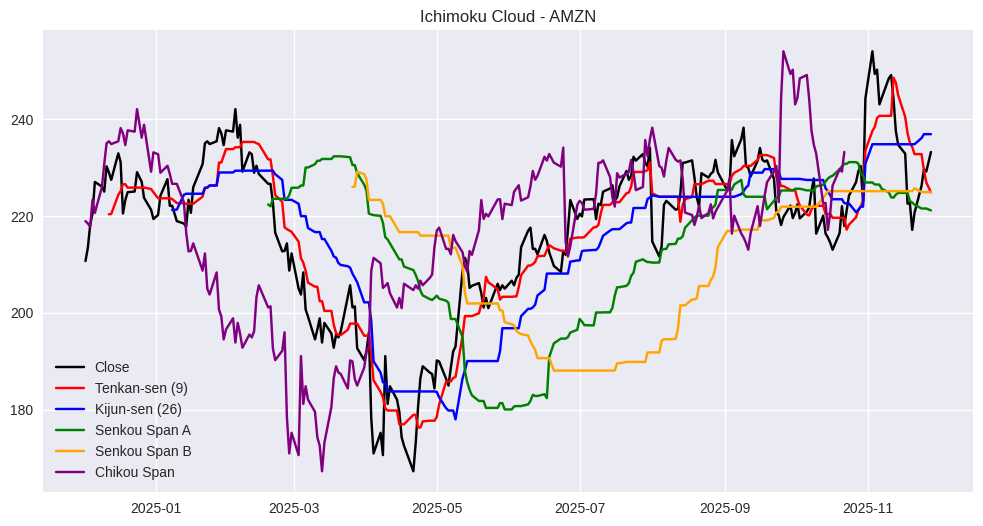

In [41]:
# 2.Momentum Indicator-Ichimoku Cloud

# Standard Ichimoku parameters
tenkan_period = 9        # Conversion line
kijun_period = 26        # Base line
senkou_span_b_period = 52
displacement = 26        # Forward / backward shift

high = data["High"]
low = data["Low"]
close = data["Close"]

# Tenkan-sen (Conversion Line)
data["tenkan_sen"] = (
    high.rolling(window=tenkan_period).max() +
    low.rolling(window=tenkan_period).min()
) / 2

# Kijun-sen (Base Line)
data["kijun_sen"] = (
    high.rolling(window=kijun_period).max() +
    low.rolling(window=kijun_period).min()
) / 2

# Senkou Span A (Leading Span A)
data["senkou_span_a"] = (
    (data["tenkan_sen"] + data["kijun_sen"]) / 2
).shift(displacement)

# Senkou Span B (Leading Span B)
data["senkou_span_b"] = (
    high.rolling(window=senkou_span_b_period).max() +
    low.rolling(window=senkou_span_b_period).min()
) / 2
data["senkou_span_b"] = data["senkou_span_b"].shift(displacement)

# Chikou Span (Lagging Span)
data["chikou_span"] = close.shift(-displacement)

plt.figure(figsize=(12, 6))
plt.plot(close, label="Close", color="black")
plt.plot(data["tenkan_sen"], label="Tenkan-sen (9)", color="red")
plt.plot(data["kijun_sen"], label="Kijun-sen (26)", color="blue")
plt.plot(data["senkou_span_a"], label="Senkou Span A", color="green")
plt.plot(data["senkou_span_b"], label="Senkou Span B", color="orange")
plt.plot(data["chikou_span"], label="Chikou Span", color="purple")
plt.title(f"Ichimoku Cloud - {ticker}")
plt.legend()
plt.show()


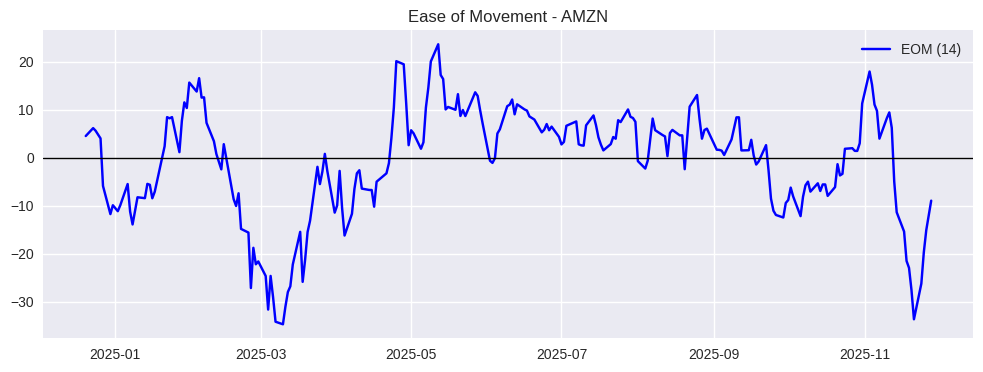

In [42]:
# 3.Volume Indicator-Ease of Movement

eom_period = 14  # smoothing period

# Midpoint move
midpoint_today = (high + low) / 2
midpoint_yesterday = (high.shift(1) + low.shift(1)) / 2
midpoint_move = midpoint_today - midpoint_yesterday

# Box ratio (scaled volume so numbers stay reasonable)
box_ratio = (data["Volume"] / 1e8) / (high - low)

data["EOM_raw"] = midpoint_move / box_ratio
data["EOM"] = data["EOM_raw"].rolling(window=eom_period).mean()

plt.figure(figsize=(12, 4))
plt.plot(data["EOM"], label=f"EOM ({eom_period})", color="blue")
plt.axhline(0, color="black", linewidth=1)
plt.title(f"Ease of Movement - {ticker}")
plt.legend()
plt.show()

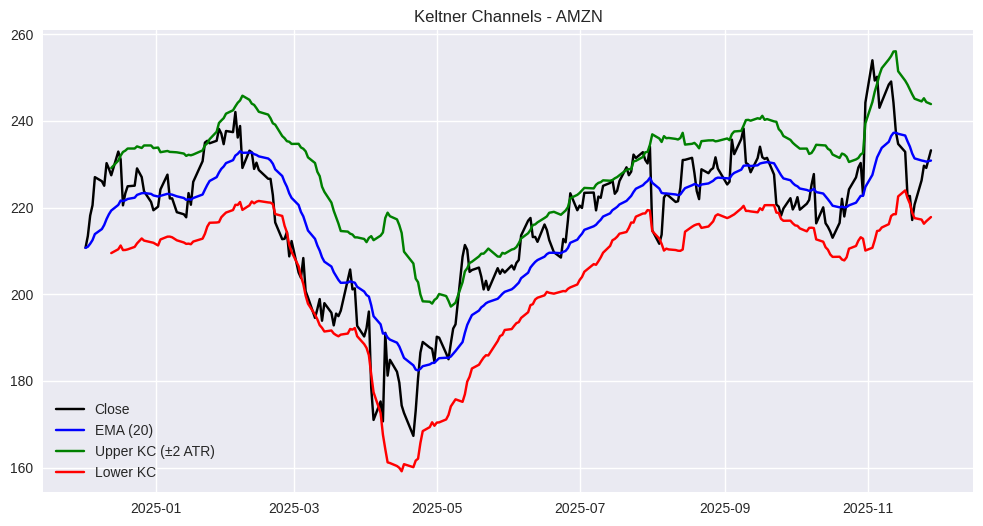

In [43]:
#4.Volatility Indicator- Keltner Channels

ema_period = 20      # baseline EMA
atr_period = 10      # ATR lookback
multiplier = 2       # band width multiplier

# EMA of Close
data["EMA"] = close.ewm(span=ema_period, adjust=False).mean()

# True Range components
tr1 = high - low
tr2 = (high - close.shift(1)).abs()
tr3 = (low - close.shift(1)).abs()
true_range = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)

# ATR
data["ATR"] = true_range.rolling(window=atr_period).mean()

# Keltner Channels
data["upper_KC"] = data["EMA"] + multiplier * data["ATR"]
data["lower_KC"] = data["EMA"] - multiplier * data["ATR"]

plt.figure(figsize=(12, 6))
plt.plot(close, label="Close", color="black")
plt.plot(data["EMA"], label=f"EMA ({ema_period})", color="blue")
plt.plot(data["upper_KC"], label=f"Upper KC (±{multiplier} ATR)", color="green")
plt.plot(data["lower_KC"], label="Lower KC", color="red")
plt.title(f"Keltner Channels - {ticker}")
plt.legend()
plt.show()
